In [6]:
def get_product(KEY, STAT_CD, PERIOD, START_DATE, END_DATE):
    # 파이썬에서 인터넷을 연결하기 위해 urllib 패키지 사용. urlopen함수는 지정한 url과 소켓 통신을 할 수 있도록 자동 연결해줌
    import requests
    from bs4 import BeautifulSoup
    import pandas as pd
    from lxml import html
    from urllib.request import Request, urlopen
    from urllib.parse import urlencode, quote_plus, unquote
    import pprint

    url = 'https://ecos.bok.or.kr/api/StatisticSearch/I9I2NH8WS9QQC4R29EZM/xml/kr/1/9999/901Y009/Q/2018Q1/2040Q4'\
            .format(KEY # 인증키
                   , STAT_CD # 추출할 통계지표의 코드
                   , PERIOD # 기간 단위
                   , START_DATE # 데이터 시작일
                   , END_DATE) # 데이터 종료일

    response = requests.get(url).content.decode('utf-8')
    
    xml_obj = BeautifulSoup(response, 'lxml-xml')
    # xml_obj
    rows = xml_obj.findAll("row")
    return rows

# 파라미터 정의
# 추출하고자 하는 통계지표 disc type - {통계지표 코드: 통계지표명}
data_dict = {
'901Y009' : '물가지표'
}

# 인증키
KEY = 'I9I2NH8WS9QQC4R29EZM'

# 그외 파라미터
PERIOD = 'M'
START_DATE = '202001'
END_DATE = '203308'

# API의 반환(출력)값 중 저장하고자 하는 항목(item) 리스트
item_list = [
'STAT_CODE' # 통계표코드
, 'STAT_NAME' # 통계명
, 'ITEM_CODE1' # 통계항목1코드
, 'ITEM_NAME1' # 통계항목명1
, 'ITEM_CODE2' # 통계항목2코드
, 'ITEM_NAME2' # 통계항목명2
, 'ITEM_CODE3' # 통계항목3코드
, 'ITEM_NAME3' # 통계항목명3
, 'UNIT_NAME' # 단위
, 'TIME' # 시점
, 'DATA_VALUE'# 값
]

# 결과치를 담을 빈 리스트 생성
result_list = list()

# API를 순차적으로 호출하고 값을 담는 for loop 구문
for k in data_dict.keys():
    rows = get_product(KEY, k, PERIOD, START_DATE, END_DATE)
    print(len(rows)) # 수집해야 할 데이터의 row가 총 몇 개인지 출력
    
    for p in range(0, len(rows)):
        info_list = list()
        
        for i in item_list:
            try:
                individual_info = rows[p].find(i).text # 만약 반환 중 error가 발생하면
            except:
                individual_info = "" # 해당 항목은 공란으로 채운다
        
            info_list.append(individual_info)
        result_list.append(info_list)
    result_list
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from datetime import datetime


# 결과 리스트를 DataFrame으로 변환 + 컬럼명 지정
result_df = DataFrame(result_list, columns=[
'통계표코드'
, '통계명'
, '통계항목1코드'
, '통계항목명1'
, '통계항목2코드'
, '통계항목명2'
, '통계항목3코드'
, '통계항목명3'
, '단위'
, '시점'
, '값'
]).drop_duplicates() # 중복된 row 제거

result_df
result_df.to_csv('D:\python\jupyter/물가지표.csv',encoding='euc-kr')

9999


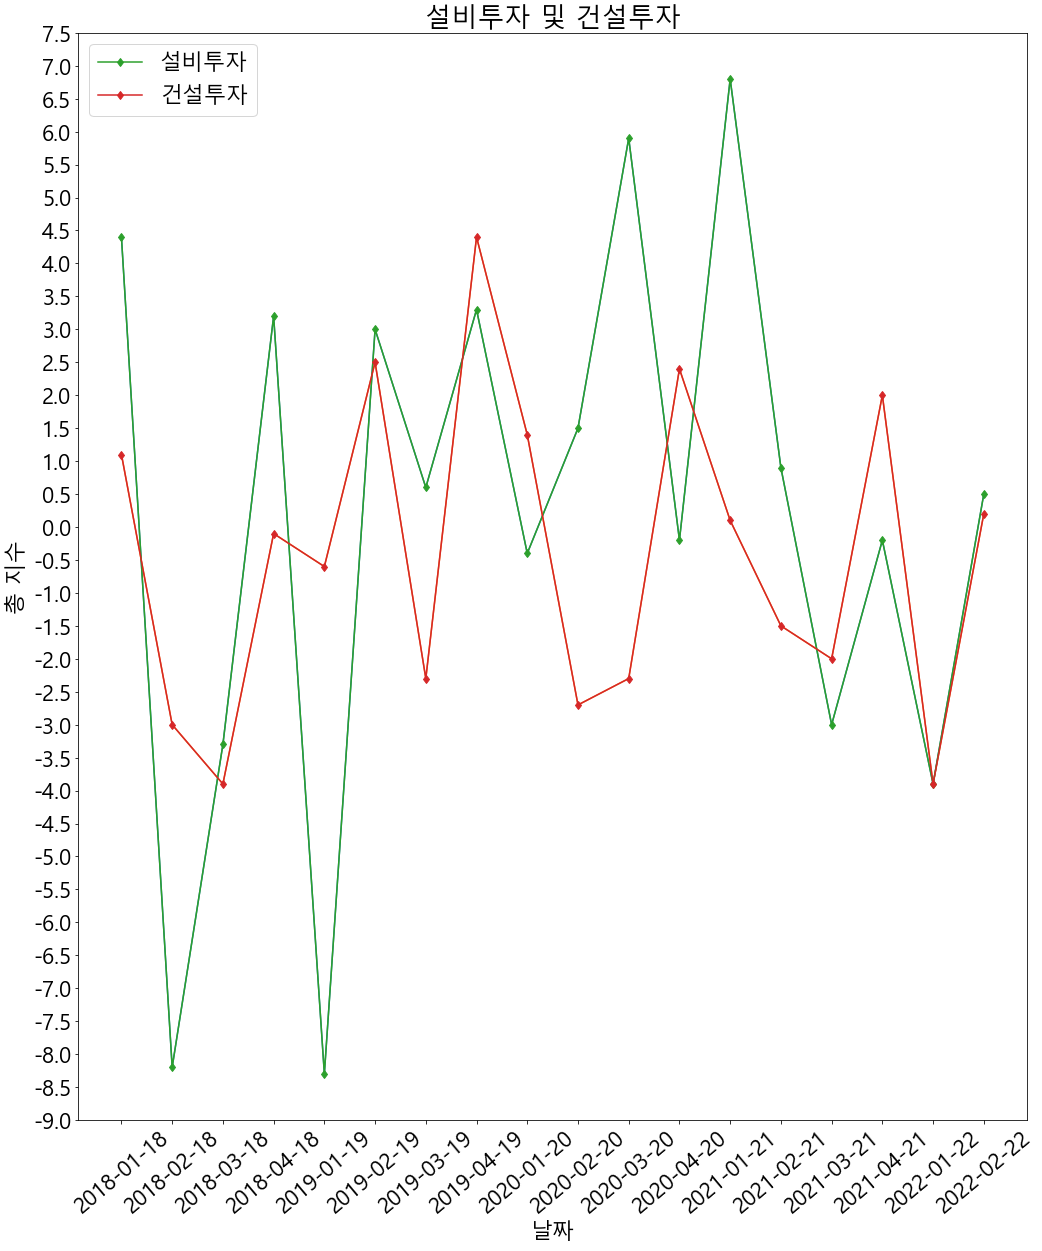

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('설비투자.csv', encoding='euc-kr')
df1 = pd.read_csv ('건설투자.csv', encoding='euc-kr')
df.head(18)
df = df[['date', 'value']]
df1 = df1[['date', 'value']]


# plot
plt.figure(figsize=(17, 20))
plt.rcParams.update({'font.size': 22})
plt.plot(df['date'], df['value'])
plt.plot(df1['date'], df1['value'])
ax = df.set_index('date')['value'].plot(kind='line', marker='d', label = '설비투자')
ax = df1.set_index('date')['value'].plot(kind='line', marker='d', label = '건설투자')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim([-9,7])
plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 0.5))
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("설비투자 및 건설투자")
plt.show()

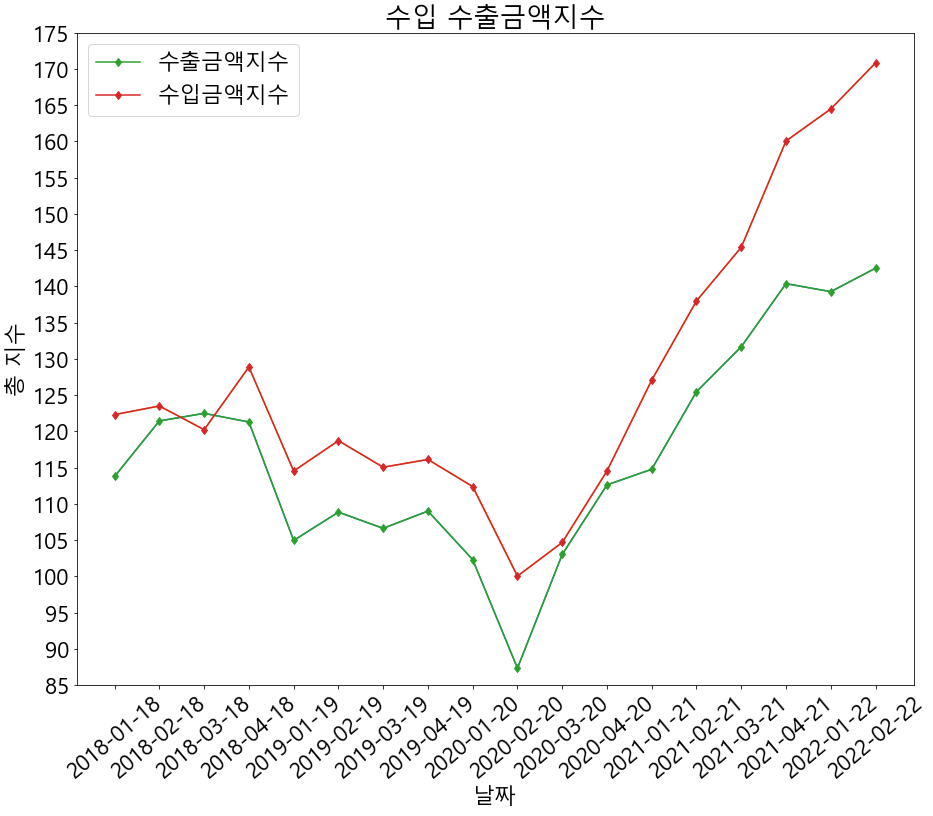

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('수출금액지수.csv', encoding='euc-kr')
df1 = pd.read_csv ('수입금액지수.csv', encoding='euc-kr')
df.head(18)
df = df[['date', 'value']]
df1 = df1[['date', 'value']]


# plot
plt.figure(figsize=(15, 12))
plt.rcParams.update({'font.size': 22})
plt.plot(df['date'], df['value'])
plt.plot(df1['date'], df1['value'])
ax = df.set_index('date')['value'].plot(kind='line', marker='d', label = '수출금액지수')
ax = df1.set_index('date')['value'].plot(kind='line', marker='d', label = '수입금액지수')
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim([85,175])
plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 5))
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("수입 수출금액지수")
plt.show()

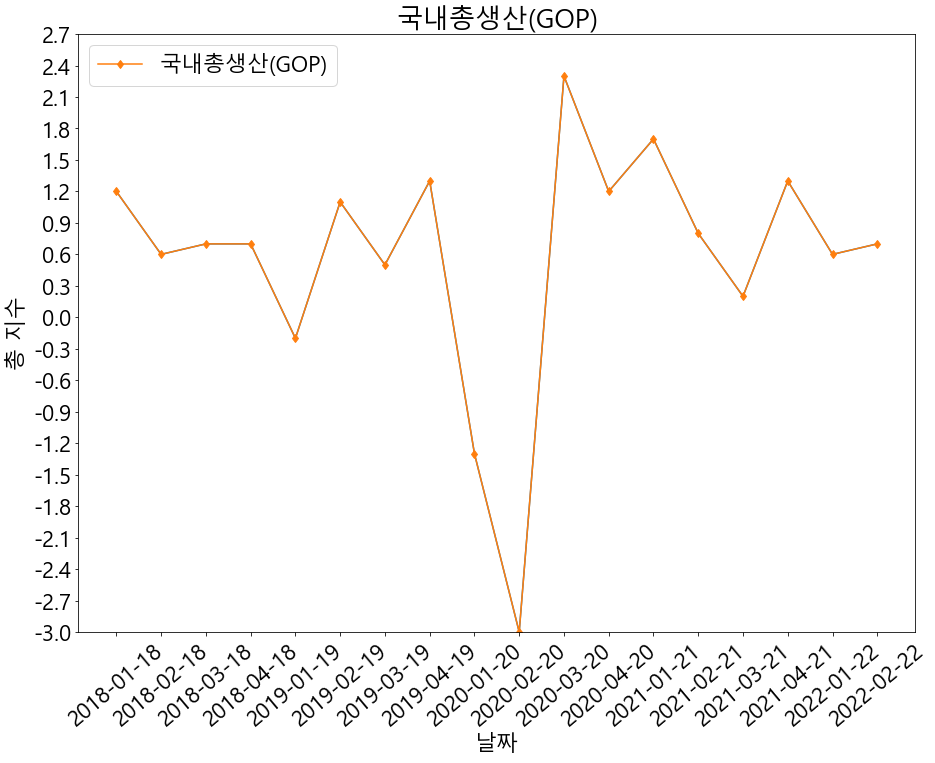

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('국내총생산.csv', encoding='euc-kr')
df.head(18)
df = df[['date', 'value']]


# plot
plt.figure(figsize=(15, 11))
plt.rcParams.update({'font.size': 22})
plt.plot(df['date'], df['value'])
ax = df.set_index('date')['value'].plot(kind='line', marker='d', label='국내총생산(GOP)')
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim([-3,2])
plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 0.3))
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("국내총생산(GOP)")
plt.show()

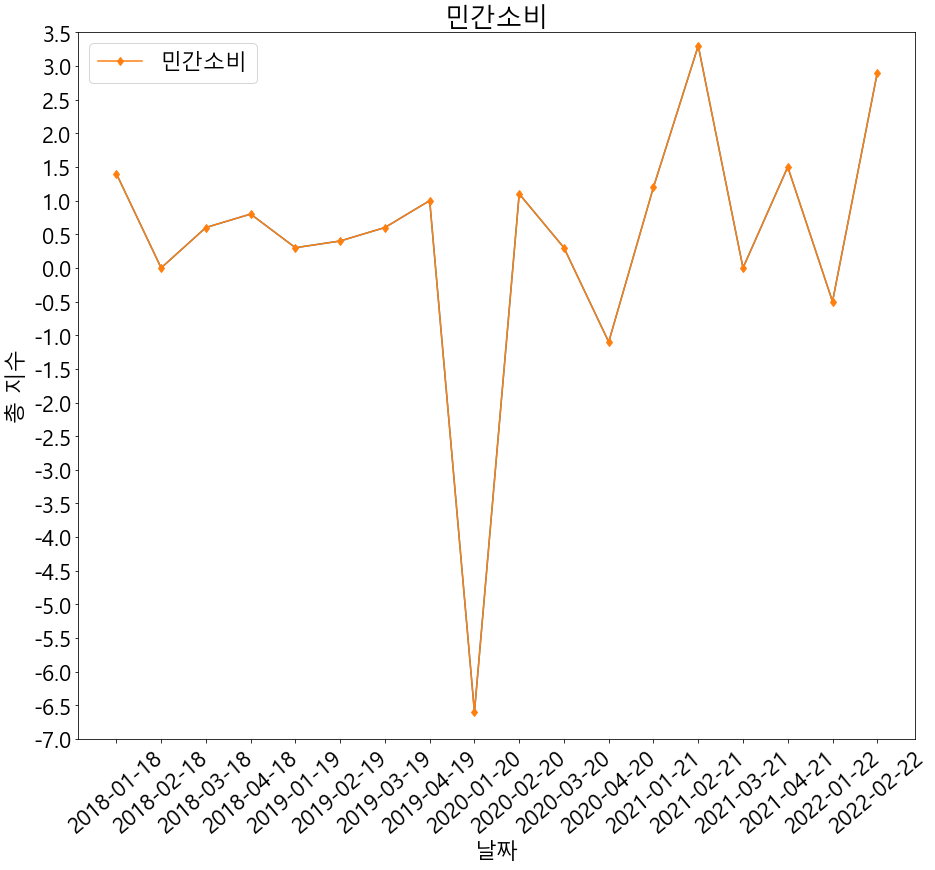

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('민간소비.csv', encoding='euc-kr')
df.head(18)
df = df[['date', 'value']]


# plot
plt.figure(figsize=(15, 13))
plt.rcParams.update({'font.size': 22})
plt.plot(df['date'], df['value'])
ax = df.set_index('date')['value'].plot(kind='line', marker='d', label='민간소비')
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim([-7,3])
plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 0.5))
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("민간소비")
plt.show()

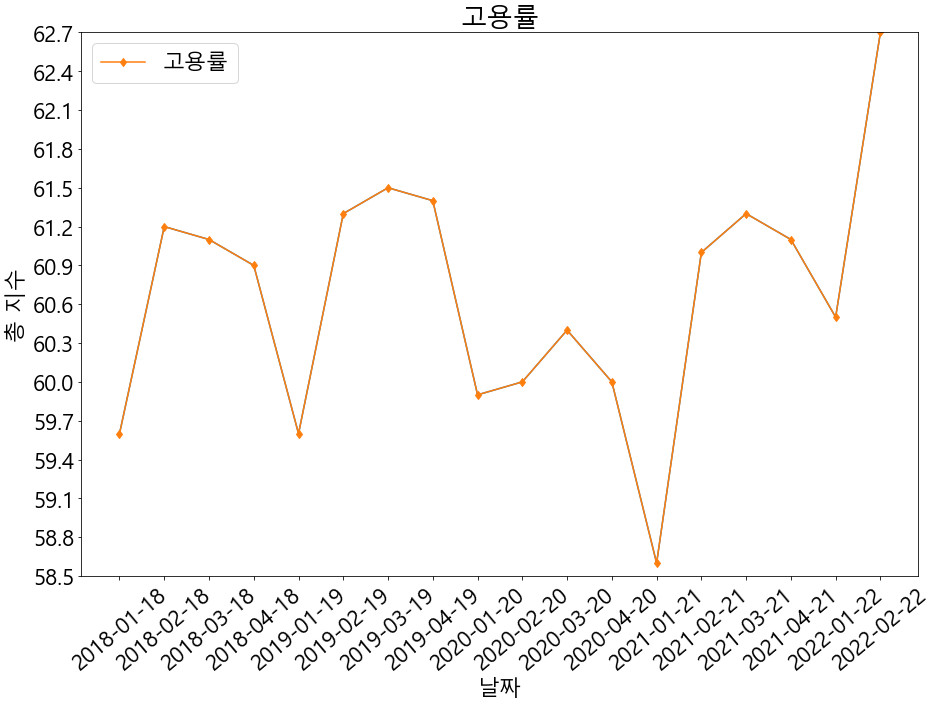

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('고용률.csv', encoding='euc-kr')
df.head(18)
df = df[['date', 'value']]


# plot
plt.figure(figsize=(15, 10))
plt.rcParams.update({'font.size': 22})
plt.plot(df['date'], df['value'])
ax = df.set_index('date')['value'].plot(kind='line', marker='d', label='고용률')
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.ylim([58.5,62])
plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 0.3))
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("고용률")
plt.show()

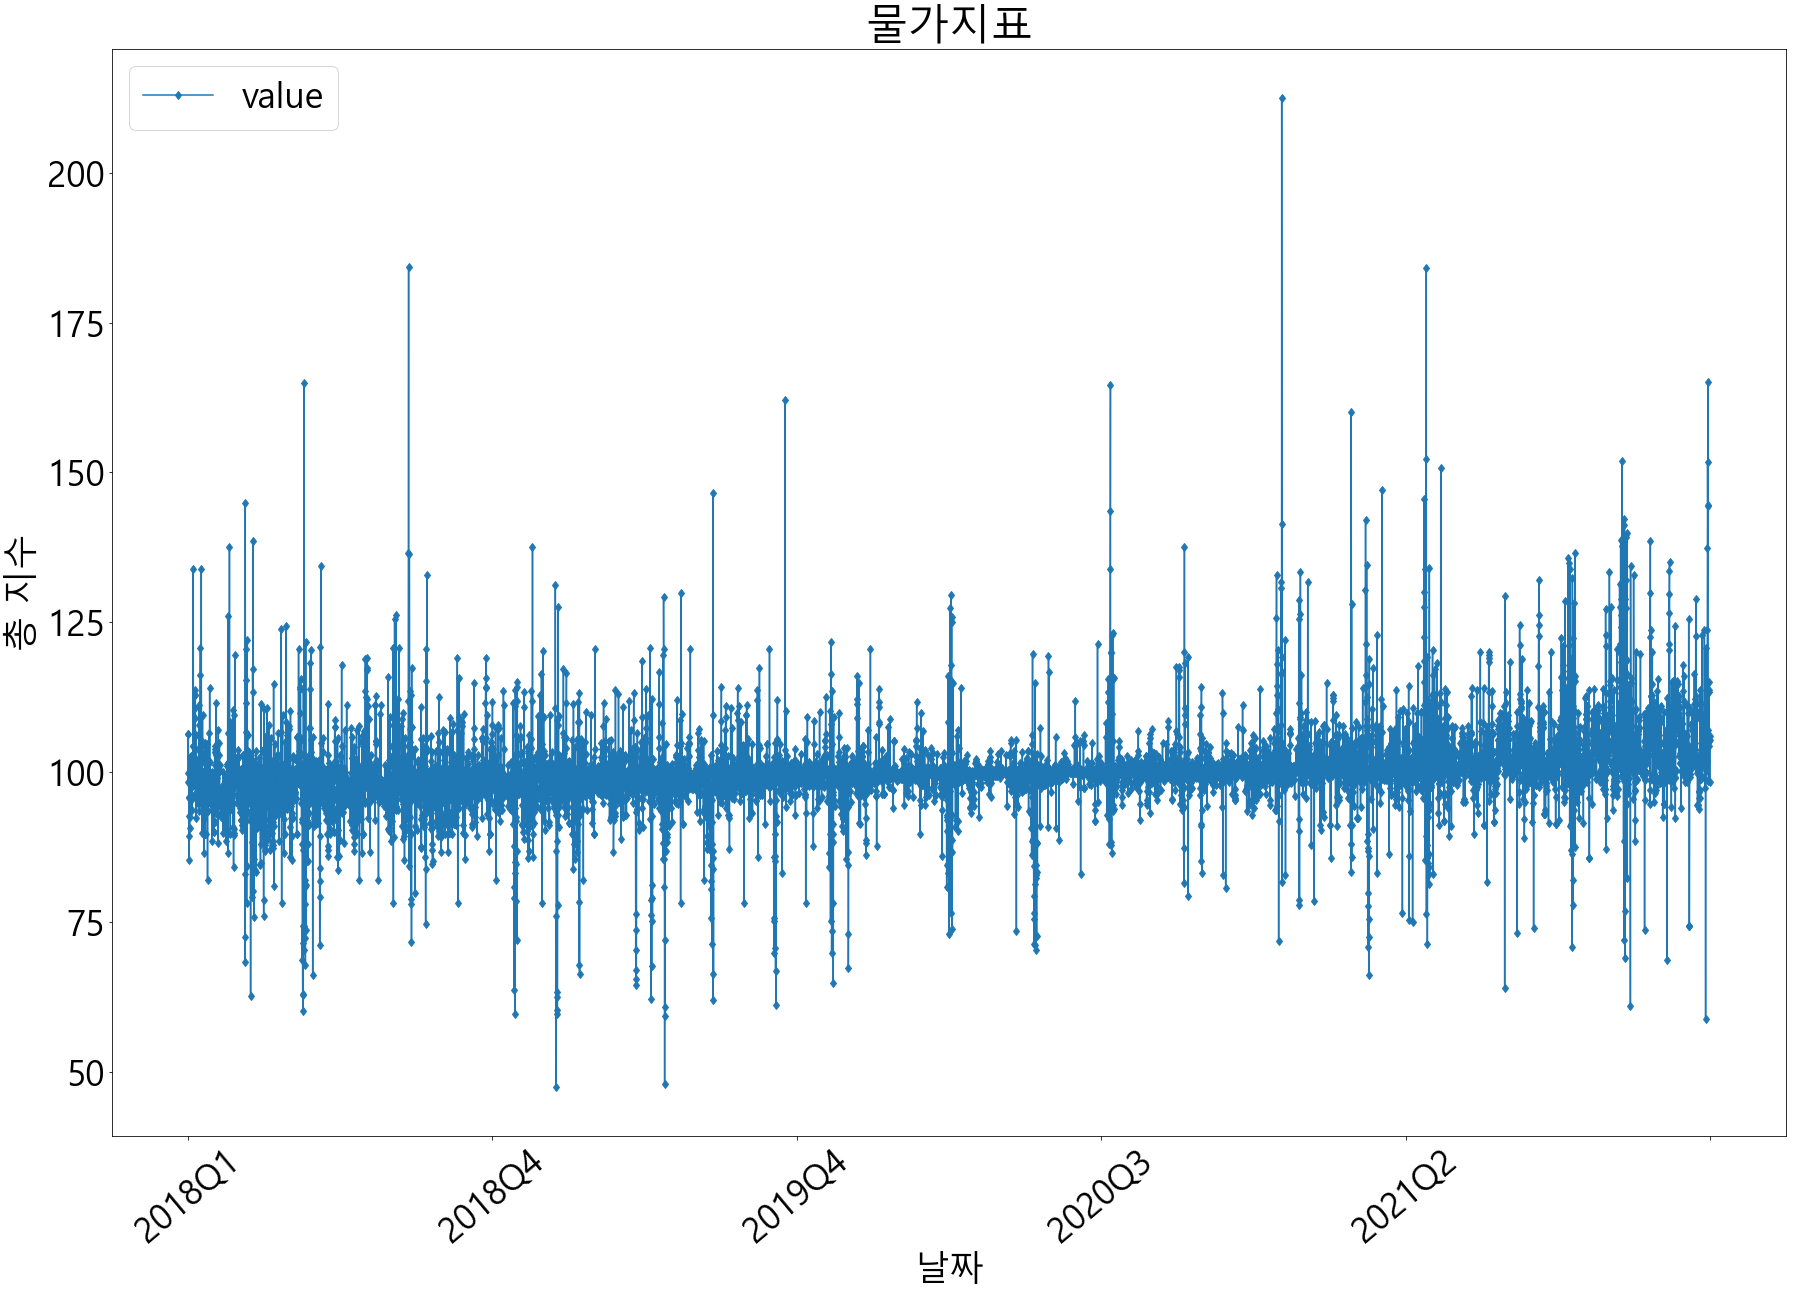

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


df = pd.read_csv ('물가지표.csv', encoding='euc-kr')
df.head()
df = df[['date', 'value']]


# plot
plt.figure(figsize=(30, 20))
plt.rcParams.update({'font.size': 35})
ax = df.set_index('date')['value'].plot(kind='line', marker='d')
ax.set_ylabel("총 지수")
ax.set_xlabel("날짜")
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
# plt.ylim([58,62])
# plt.yticks(np.arange(min(plt.ylim()), max(plt.ylim())+1, 0.3))
plt.legend(loc=2)
plt.xticks(rotation=40)
plt.title("물가지표")
plt.show()